## Mandatory assignment
### FIE463: Numerical Methods in Macroeconomics and Finance using Python

### Task 1

In [45]:
import numpy as np

# Define parameters
beta = 0.9
gamma = 4.0
sigma = 0.16
mu = 0.04
w = 1.0
Rf = 1.0

# Define the shock realizations and probabilities as arrays
etas = np.array([-3**0.5, 0.0, 3**0.5])
probs = np.array([1/6, 2/3, 1/6])


In [46]:
# Gross risky return
returns = Rf + mu + sigma *etas

In [47]:
ER = probs @ returns  # expected return
ER2 = probs @ returns**2 # E[R^2]
varR = ER2 - ER**2  # var(R) = E[R^2] - (E[R])^2
stdR = np.sqrt(varR) # standard deviation
risk_premium = ER -Rf # excess return
sharpe = risk_premium / stdR # sharpe ratio

In [48]:
print(returns)

[0.76287187 1.04       1.31712813]


The computed risk premium (E[R] - Rf = 0.04) matches μ = 0.04 exactly, and the computed variance (Var(R) = 0.0256) matches σ² = 0.16² = 0.0256 exactly. This confirms that the three-state discretization of η perfectly reproduces the mean and variance of the underlying normal distribution.

### task 2

In [49]:
def util(c, gamma):
    """
    return the flow utility of consumption for a given risk aversion
    """

    u = -np.exp(-gamma*c)
    return u

Text(0, 0.5, 'utility u(c)')

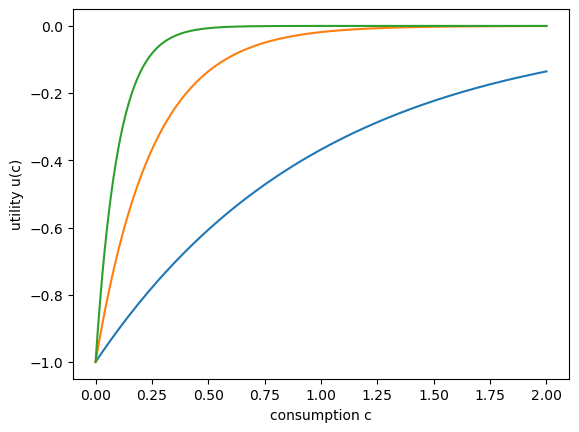

In [76]:
import matplotlib.pyplot as plt

c_grid = np.linspace(0,2,200)
gamma_values = [1,4,10]

plt.plot(c_grid, util(c_grid,1), label = 'y = 1')
plt.plot(c_grid, util(c_grid,4), label = 'y = 4')
plt.plot(c_grid, util(c_grid,10), label = 'y = 10')
plt.xlabel('consumption c')
plt.ylabel('utility u(c)')

### Task 3

In [ ]:
def expected_util(s, alpha, beta, gamma, sigma, mu, w, etas, probs):
    """
    Calculate the expected lifetime utility for given parameters.
    """
    Rf = 1.0
    
    # Period-1 consumption
    c1 = w - s

    #Gross riksy returns for each state
    R = Rf + mu + sigma * etas
    
    # compute expected utility of c2 by looping over states
    Eu2 = 0
    for i in range(len(etas)):
        c2 = R[i] * alpha * s + Rf * (1 - alpha) * s
        Eu2 = Eu2 + probs[i] * util(c2, gamma)

    # Lifetime Utility
    u1 = util(c1, gamma)
    U = u1 + beta * Eu2
    return U

### Task 4: Write a Python function expected_util()


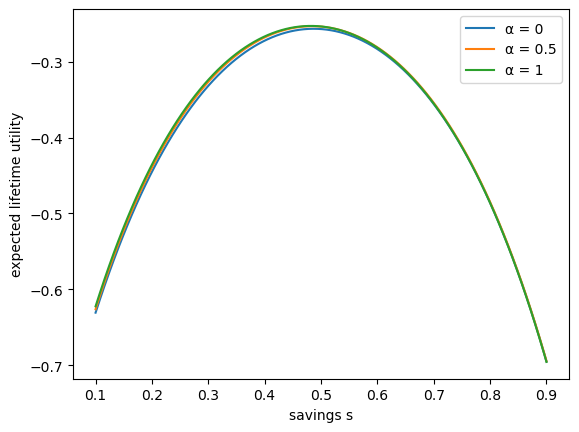

In [75]:
s_grid = np.linspace(0.1,w-0.1,200)

for alpha in[0, 0.5, 1]:
    utilities = expected_util(s_grid, alpha, beta, gamma, sigma, mu, w, etas, probs)
    plt.plot(s_grid, utilities, label = f'α = {alpha}')

plt.xlabel('savings s')
plt.ylabel('expected lifetime utility')
plt.legend()

### Task 5

In [78]:
def find_optimum(beta, gamma, sigma, mu, w, etas, probs):
    """
    Find the optimal savings level and risky share to maximize expected utility.
    """

    #Candidate gruds for savings and risky share
    s_grid = np.linspace(1e-6, w - 1e-6, 1000)
    alpha_grid = np.linspace(0, 1, 1000)

    # Initialize best values
    U_max = -np.inf
    s_opt = 0
    alpha_opt = 0

    # Loop over risky shares, vectorize over savings
    for alpha in alpha_grid:
        utilities = expected_util(s_grid, alpha, beta, gamma, sigma, mu, w, etas, probs)

        # Finds best savings for this alpha
        imax = np.argmax(utilities)
        if utilities[imax] > U_max:
            U_max = utilities[imax]
            s_opt = s_grid[imax]
            alpha_opt = alpha

    return s_opt, alpha_opt, U_max


### task 6

In [66]:
s_opt, alpha_opt, U_max = find_optimum(beta, gamma, sigma, mu, w, etas, probs)

print(f'optimal savings: s = {s_opt:.5f}')
print(f'optimal risky share: α = {alpha_opt:.5f} ')
print(f'maximized expected utility: U = {U_max:.5f}')


optimal savings: s = 0.48248
optimal risky share: α = 0.80981 
maximized expected utility: U = -0.25280


### task 7

C:\Users\Danay\AppData\Local\Temp\ipykernel_19740\3798221315.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


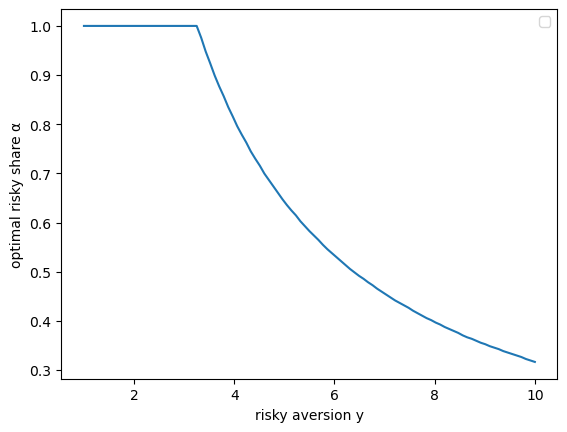

In [ ]:
# Compute optimal riksy share for each level of risk aversion
gamma_grid = np.linspace(1, 10, 101)

alpha_opt_list = []

for g in gamma_grid:    
    s, alpha, U =find_optimum(beta, g, sigma, mu, w, etas, probs)
    alpha_opt_list.append(alpha)

plt.plot(gamma_grid, alpha_opt_list)
plt.xlabel('risky aversion y')
plt.ylabel('optimal risky share α')
plt.legend()



The plot shows that the optimal risky share α decreases as absolute risk aversion γ increases. For low values of γ (below about 3), the investor is willing to invest everything in the risky asset (α = 1), as the expected excess return more than compensates for the risk. As γ increases beyond 3, the investor becomes increasingly risk-averse and reduces their exposure to the risky asset. At γ = 10, the investor allocates only about 30% to the risky asset. This is consistent with the properties of CARA utility, where more risk-averse investors demand a larger premium to bear risk, and therefore hold less of the risky asset.

### Task 8

C:\Users\Danay\AppData\Local\Temp\ipykernel_19740\362986305.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


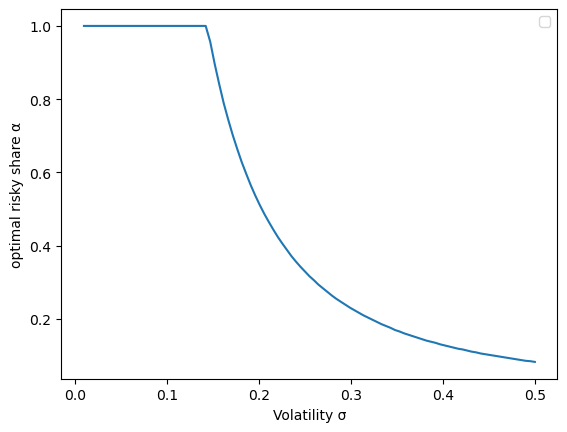

In [73]:
sigma_grid = np.linspace(0.01, 0.5, 101)

alpha_opt_list = []

for sig in sigma_grid:    
    s, alpha, U =find_optimum(beta, gamma, sig, mu, w, etas, probs)
    alpha_opt_list.append(alpha)

plt.plot(sigma_grid, alpha_opt_list)
plt.xlabel('Volatility σ')
plt.ylabel('optimal risky share α')
plt.legend()

The optimal risky share α decreases as volatility σ increases. For low values of σ (below about 0.15), the risky asset has little uncertainty relative to its expected excess return μ, making it very attractive — the investor allocates everything to the risky asset (α = 1). As σ increases, the risk-return tradeoff worsens: the Sharpe ratio (μ/σ) falls, meaning the investor is less compensated per unit of risk. The investor therefore reduces their risky allocation. At σ = 0.5, the optimal risky share drops to about 0.08, as the high volatility makes the risky asset far less attractive.